In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [173]:
train_df = pd.read_csv(r'C:\Users\wwwKa\OneDrive\Desktop\Kaggle 2\applications-of-machine-learning-prml-hackathon-2\train')
test_df = pd.read_csv(r'C:\Users\wwwKa\OneDrive\Desktop\Kaggle 2\applications-of-machine-learning-prml-hackathon-2\test')

In [174]:
train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] = train_df['Prediction'].str.split(',', expand=True)

In [175]:
train_df.drop('Prediction', axis=1, inplace=True)

In [176]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
111718,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
111719,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
111720,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
111721,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0


In [177]:
cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [178]:
cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [179]:
train_df1 = train_df[cols]
for i in cols:
    train_df1[i] = train_df1[i].astype(int)
    train_df[i] = train_df[i].astype(int)

C:\Users\wwwKa\AppData\Local\Temp\ipykernel_6368\4137174749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1[i] = train_df1[i].astype(int)


In [180]:
for i in cols:
    print(f'{i} : {train_df1[i].sum()}')

toxic : 10676
severe_toxic : 1087
obscene : 5905
threat : 321
insult : 5523
identity_hate : 967


In [181]:
train_df.sample(5)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
66494,fe3c4cdf8e3bc4d3,""""""" said sherly from the porn flick beyoncebey...",1,0,0,0,0,0
10975,290bafc6a7fbecab,"Basement Fag \n\nHello, could you please expla...",1,0,1,0,1,0
77914,53dbd6e696b02ee3,Fantastic work. Congratulations all involved. ...,0,0,0,0,0,0
74270,383d7a71ab5291a7,"""\n\n Bwilkins \n\n So that ★★''' """,0,0,0,0,0,0
63696,f39c5ec8e45774e2,I considered removing the whole section myself...,0,0,0,0,0,0


In [182]:
train_df.describe()


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,111723.000000,111723.000000,111723.000000,111723.000000,111723.000000,111723.000000
mean,0.095558,0.009729,0.052854,0.002873,0.049435,0.008655
std,0.293985,0.098157,0.223743,0.053525,0.216775,0.092631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
unlabelled_in_all = train_df[(train_df['toxic']!=1) & (train_df['severe_toxic']!=1) & (train_df['obscene']!=1) & 
                            (train_df['threat']!=1) & (train_df['insult']!=1) & (train_df['identity_hate']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled comments is  89.84094591086884


In [12]:
# check for any 'null' comment
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [13]:
test_df.head()

,id,comment_text
0,00025465d4725e87,"""\n\nCongratulations from me as well, use the ..."
1,00031b1e95af7921,Your vandalism to the Matt Shirvington article...
2,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...
3,00054a5e18b50dd4,bbq \n\nbe a man and lets discuss it-maybe ove...
4,00078f8ce7eb276d,"""\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant..."


In [14]:
no_comment = test_df[test_df['comment_text'].isnull()]
no_comment

,id,comment_text


In [15]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols].sum())

Total rows in test is 47848
Total rows in train is 111723
toxic            10676
severe_toxic      1087
obscene           5905
threat             321
insult            5523
identity_hate      967
dtype: int64


In [16]:
# Let's look at the character length for the rows in the training data and record these
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))

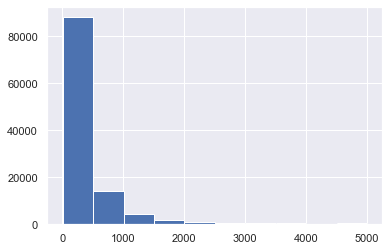

In [17]:
# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()

In [18]:
data = train_df[cols]


In [19]:
data

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
111718,0,0,0,0,0,0
111719,0,0,0,0,0,0
111720,0,0,0,0,0,0
111721,0,0,0,0,0,0


<AxesSubplot:title={'center':'Correlation of features & targets'}>

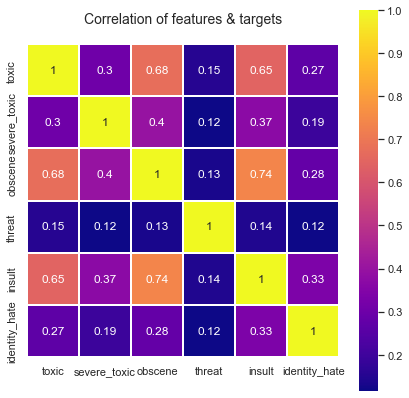

In [20]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [21]:
test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))


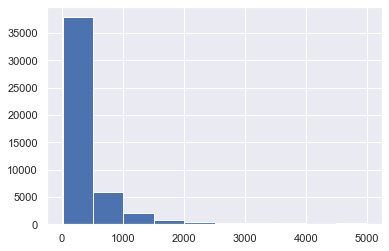

In [22]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

In [24]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [25]:
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

In [26]:
# clean the comment_text in test_df [Thanks, Pulkit Jha.]
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))

In [27]:
train_df = train_df.drop('char_length',axis=1)

In [28]:
X = train_df.comment_text
test_X = test_df.comment_text

In [29]:
print(X.shape, test_X.shape)


(111723,) (47848,)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
111718,ffd72e9766c09c97,auto guides and the motoring press are not goo...,0,0,0,0,0,0
111719,ffe029a7c79dc7fe,please identify what part of blp applies becau...,0,0,0,0,0,0
111720,ffe897e7f7182c90,catalan independentism is the social movement ...,0,0,0,0,0,0
111721,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0


In [30]:
# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [31]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm

<111723x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2224327 stored elements in Compressed Sparse Row format>

In [32]:
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<47848x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 951881 stored elements in Compressed Sparse Row format>

In [33]:
cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()

# create submission file
#submission_binary = pd.read_csv('../input/sample_submission.csv')

for label in cols:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    #submission_binary[label] = test_y_prob

... Processing toxic


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9591221145153639
... Processing severe_toxic
Training accuracy is 0.9909687351753891
... Processing obscene
Training accuracy is 0.9793417649006919
... Processing threat
Training accuracy is 0.9974042945499136
... Processing insult
Training accuracy is 0.9726734871065045
... Processing identity_hate
Training accuracy is 0.9925172077369924


In [72]:
logreg = LogisticRegression(C=12.0)
y = train_df['toxic']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))

Training accuracy is 0.9654323639716084


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
train_main_sample = []
train_main_sample.append((y_pred_X))
train_main_sample

[array([0, 0, 0, ..., 0, 0, 0])]

In [53]:
cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [74]:
logreg = LogisticRegression(C=12.0)
y = train_df['severe_toxic']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))

Training accuracy is 0.9925082570285438


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
train_main_sample.append((y_pred_X))
train_main_sample

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]

In [76]:
cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [77]:
logreg = LogisticRegression(C=12.0)
y = train_df['obscene']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample

Training accuracy is 0.9842019995882674


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [78]:
logreg = LogisticRegression(C=12.0)
y = train_df['threat']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample

Training accuracy is 0.998424675313051


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [79]:
logreg = LogisticRegression(C=12.0)
y = train_df['insult']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample

Training accuracy is 0.9767550101590541


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [80]:
logreg = LogisticRegression(C=12.0)
y = train_df['identity_hate']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample

Training accuracy is 0.9940656802985957


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [89]:
trainfile  = pd.DataFrame(train_main_sample)
trainfile = trainfile.transpose()
trainfile

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
111718,0,0,0,0,0,0
111719,0,0,0,0,0,0
111720,0,0,0,0,0,0
111721,0,0,0,0,0,0


In [105]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()

# create submission file
#submission_binary = pd.read_csv('../input/sample_submission.csv')

for label in cols:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict(test_X_dtm)
    #submission_binary[label] = test_y_prob

... Processing toxic


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9591221145153639
... Processing severe_toxic
Training accuracy is 0.9909687351753891
... Processing obscene
Training accuracy is 0.9793417649006919
... Processing threat
Training accuracy is 0.9974042945499136
... Processing insult
Training accuracy is 0.9726734871065045
... Processing identity_hate
Training accuracy is 0.9925172077369924


In [106]:
test_y_prob

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
test_df.drop(['char_length'],axis = 1)


,id,comment_text
0,00025465d4725e87,congratulations from me as well use the tools ...
1,00031b1e95af7921,your vandalism to the matt shirvington article...
2,00037261f536c51d,sorry if the word nonsense was offensive to yo...
3,00054a5e18b50dd4,bbq be a man and lets discuss it maybe over th...
4,00078f8ce7eb276d,juelz santanas age in 2002 juelz santana was 1...
...,...,...
47843,ffd2e85b07b3c7e4,no he did not read it again i would have thoug...
47844,ffe8b9316245be30,the numbers in parentheses are the additional ...
47845,ffe987279560d7ff,and for the second time of asking when your vi...
47846,ffea4adeee384e90,you should be ashamed of yourself that is a ho...


In [108]:
temp = []


In [109]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=12.0)
y = train_df['toxic']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample
test_y_prob = logreg.predict(test_X_dtm)
temp.append(test_y_prob)
temp

Training accuracy is 0.9654323639716084


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([0, 0, 0, ..., 0, 0, 0])]

In [110]:
cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=12.0)
y = train_df['severe_toxic']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample
test_y_prob = logreg.predict(test_X_dtm)
temp.append(test_y_prob)
temp

Training accuracy is 0.9925082570285438


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=12.0)
y = train_df['obscene']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample
test_y_prob = logreg.predict(test_X_dtm)
temp.append(test_y_prob)
temp

Training accuracy is 0.9842019995882674


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=12.0)
y = train_df['threat']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample
test_y_prob = logreg.predict(test_X_dtm)
temp.append(test_y_prob)
temp

Training accuracy is 0.998424675313051


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=12.0)
y = train_df['insult']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample
test_y_prob = logreg.predict(test_X_dtm)
temp.append(test_y_prob)
temp

Training accuracy is 0.9767550101590541


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=12.0)
y = train_df['identity_hate']
logreg.fit(X_dtm, y)
y_pred_X = logreg.predict(X_dtm)
print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
train_main_sample.append((y_pred_X))
train_main_sample
test_y_prob = logreg.predict(test_X_dtm)
temp.append(test_y_prob)
temp

Training accuracy is 0.9940656802985957


C:\Users\wwwKa\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [116]:
mainfile = pd.DataFrame(temp)

In [117]:
mainfile

,0,1,2,3,4,5,6,7,8,9,...,47838,47839,47840,47841,47842,47843,47844,47845,47846,47847
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
mainfile = mainfile.transpose()

mainfile

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
47843,0,0,0,0,0,0
47844,0,0,0,0,0,0
47845,0,0,0,0,0,0
47846,0,0,0,0,0,0


In [121]:
t = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
mainfile.columns = t

In [122]:
mainfile

,p1,p2,p3,p4,p5,p6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
47843,0,0,0,0,0,0
47844,0,0,0,0,0,0
47845,0,0,0,0,0,0
47846,0,0,0,0,0,0


In [123]:
for i in t:
    mainfile[i] = mainfile[i].astype(str)

In [126]:
mainfile['Prediction'] = mainfile['p1'] +','+ mainfile['p2'] +','+ mainfile['p3'] +','+ mainfile['p4'] +','+ mainfile['p5'] +','+ mainfile['p6']

In [133]:
for i in t:
    mainfile.drop([i], axis=1, inplace=True)

In [136]:
mainfile

,Prediction
0,"0,0,0,0,0,0"
1,"0,0,0,0,0,0"
2,"0,0,0,0,0,0"
3,"0,0,0,0,0,0"
4,"0,0,0,0,0,0"
...,...
47843,"0,0,0,0,0,0"
47844,"0,0,0,0,0,0"
47845,"0,0,0,0,0,0"
47846,"0,0,0,0,0,0"


In [137]:
mainfile.to_csv('file1.csv')

Using NB Logistics

In [138]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [139]:
target = train_df[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
target.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [140]:
target.sum(axis=0) / target.shape[0]


toxic            0.095558
severe_toxic     0.009729
obscene          0.052854
threat           0.002873
insult           0.049435
identity_hate    0.008655
dtype: float64

In [143]:
def preprocess(corpus):

    for text in corpus:

        text = text.lower()                                               
        text = re.sub(r'https?://[^\s\n\r]+', '', text)  
        text = re.sub('\w*\d\w*', '', text)                               
        yield ' '.join([word for word in text.split(' ')]) 

In [144]:
clean_comments = list(preprocess(train_df['comment_text']))


In [145]:
test_clean_comments = list(preprocess(test_df["comment_text"]))


In [141]:
def probNB(bow,target,cat):
    p = np.array(bow[target==cat].sum(axis=0))
    return np.transpose((p+1) / (p.sum() + bow.shape[1]))

In [142]:
def get_model(bow,target):
    log = np.log(probNB(bow,target,1)/probNB(bow,target,0))
    m = bow.dot(log)
    model = LogisticRegression(C=4).fit(m,target)
    return model , log

In [151]:
# Word embeddings
tfidf_vec = TfidfVectorizer(ngram_range=(1,2),min_df=3,max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
tfidf = tfidf_vec.fit_transform(clean_comments)
tfidf_test = tfidf_vec.transform(test_clean_comments)

# Let's create our model
df_classification = pd.DataFrame() #We store probabilities into a Dataframe
df_classification['Comments'] = test_df['comment_text']

for i,j in enumerate(target.columns):
    print('fit', j)
    model,log = get_model(tfidf,target[j])
    df_classification[j] = model.predict(tfidf_test.dot(log))

fit toxic
fit severe_toxic
fit obscene
fit threat
fit insult
fit identity_hate


In [153]:
df_classification.drop(['Comments'], axis=1, inplace=True)

In [155]:
cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [157]:
for i in cols:
    df_classification[i] = df_classification[i].astype(str)

In [158]:
df_classification.columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']

In [161]:
df_classification

,p1,p2,p3,p4,p5,p6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
47843,0,0,0,0,0,0
47844,0,0,0,0,0,0
47845,0,0,0,0,0,0
47846,0,0,0,0,0,0


In [162]:
df_classification['Prediction'] = df_classification['p1'] +','+ df_classification['p2'] +','+ df_classification['p3'] +','+ df_classification['p4'] +','+ df_classification['p5'] +','+ df_classification['p6']

In [164]:
df_classification

,p1,p2,p3,p4,p5,p6,Prediction
0,0,0,0,0,0,0,"0,0,0,0,0,0"
1,0,0,0,0,0,0,"0,0,0,0,0,0"
2,0,0,0,0,0,0,"0,0,0,0,0,0"
3,0,0,0,0,0,0,"0,0,0,0,0,0"
4,0,0,0,0,0,0,"0,0,0,0,0,0"
...,...,...,...,...,...,...,...
47843,0,0,0,0,0,0,"0,0,0,0,0,0"
47844,0,0,0,0,0,0,"0,0,0,0,0,0"
47845,0,0,0,0,0,0,"0,0,0,0,0,0"
47846,0,0,0,0,0,0,"0,0,0,0,0,0"


In [165]:
for i in t:
    df_classification.drop([i], axis=1, inplace=True)

In [167]:
df_classification

,Prediction
0,"0,0,0,0,0,0"
1,"0,0,0,0,0,0"
2,"0,0,0,0,0,0"
3,"0,0,0,0,0,0"
4,"0,0,0,0,0,0"
...,...
47843,"0,0,0,0,0,0"
47844,"0,0,0,0,0,0"
47845,"0,0,0,0,0,0"
47846,"0,0,0,0,0,0"


In [168]:
df_classification.to_csv('file2.csv')

classifier

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix , f1_score
from sklearn.multiclass import OneVsRestClassifier

In [170]:
import re
import string

In [171]:
def  clean_text(text):
    text =  text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub("(\\W)"," ",text) 
    text = re.sub('\S*\d\S*\s*','', text)
    
    return text

In [184]:
train_df['comment_text'] = train_df['comment_text'].apply(lambda x:clean_text(x))


In [188]:
test_df['comment_text'] = test_df['comment_text'].apply(lambda x:clean_text(x))


In [190]:
X =  train_df.comment_text
y =  train_df.drop(['id','comment_text'],axis = 1)

In [191]:
X_train,X_valid, y_train,y_valid= train_test_split(X,y,test_size=0.2, random_state=1)


In [192]:
X_train

50661    yep you can take care of him from here on cbd ...
39867     well done xav  check out useragkadvice for ne...
81785    changing existing information that is cited to...
57953         the surname baghdadi hellenicized to bagh...
32899     theres also the new section entitled customer...
                               ...                        
50057    trampoline article the current focus of the ar...
98047                         for prom king   we love you 
5192     holly wing  this article was a  according to t...
77708    yeah i did see that there are quite a few subm...
98539      heres more illiterate text by in response to...
Name: comment_text, Length: 89378, dtype: object

In [193]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
50661,0,0,0,0,0,0
39867,0,0,0,0,0,0
81785,0,0,0,0,0,0
57953,0,0,0,0,0,0
32899,0,0,0,0,0,0
...,...,...,...,...,...,...
50057,0,0,0,0,0,0
98047,0,0,0,0,0,0
5192,0,0,0,0,0,0
77708,0,0,0,0,0,0


In [194]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',     
    analyzer='word',            
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(X_train)    
train_word_features = word_vectorizer.transform(X_train)

In [195]:
X_train_transformed = word_vectorizer.transform(X_train)
X_valid_transformed = word_vectorizer.transform(X_valid)

In [196]:
print(X_valid_transformed)


  (0, 3818149)	0.357801547792769
  (0, 3787321)	0.19265176864445746
  (0, 3786811)	0.1289561098875702
  (0, 3775848)	0.1234376941476714
  (0, 3673181)	0.2428281350485093
  (0, 3673037)	0.14338883876331152
  (0, 3281585)	0.10886554982668045
  (0, 3248855)	0.23664718269800955
  (0, 3089656)	0.16448564748312486
  (0, 3059685)	0.10671722576373377
  (0, 2837310)	0.13614961674849832
  (0, 2249575)	0.16448564748312486
  (0, 2106219)	0.2515396981002072
  (0, 2105369)	0.13252583592052578
  (0, 2030243)	0.14679433771963937
  (0, 1952712)	0.08777980622931816
  (0, 1800691)	0.2515396981002072
  (0, 1788610)	0.07279282647218574
  (0, 1728312)	0.2428281350485093
  (0, 1520945)	0.21132335800508464
  (0, 1314313)	0.23185286358649934
  (0, 1105990)	0.1402072228368161
  (0, 832627)	0.18885034901774528
  (0, 167537)	0.11427916844889205
  (0, 166383)	0.2515396981002072
  :	:
  (22343, 696632)	0.1498146380176897
  (22343, 644852)	0.15107812221763517
  (22343, 448105)	0.24103776223209
  (22343, 448009)	0.16

In [197]:
log_reg = LogisticRegression(C = 10, penalty='l2', solver = 'liblinear', random_state=45)

classifier = OneVsRestClassifier(log_reg)
classifier.fit(X_train_transformed, y_train)


y_train_pred_proba = classifier.predict_proba(X_train_transformed)
y_valid_pred_proba = classifier.predict_proba(X_valid_transformed)


roc_auc_score_train = roc_auc_score(y_train, y_train_pred_proba,average='weighted')
roc_auc_score_test = roc_auc_score(y_valid, y_valid_pred_proba,average='weighted')

print("ROC AUC Score Train:", roc_auc_score_train)
print("ROC AUC Score Test:", roc_auc_score_test)

ROC AUC Score Train: 0.9998530072616212
ROC AUC Score Test: 0.9756943024921284


In [198]:
def make_test_predictions(df,classifier):
    df.comment_text = df.comment_text.apply(clean_text)
    X_test = df.comment_text
    X_test_transformed = word_vectorizer.transform(X_test)
    y_test_pred = classifier.predict(X_test_transformed)
    
    return y_test_pred
    #result =  sum(y_test_pred[0])
    #if result >=1 :
       #return("Toxic Comment")
    #else :
       #return ("NonToxic Comment")

In [200]:
test_df

,id,comment_text
0,00025465d4725e87,congratulations from me as well use the tool...
1,00031b1e95af7921,your vandalism to the matt shirvington article...
2,00037261f536c51d,sorry if the word nonsense was offensive to yo...
3,00054a5e18b50dd4,bbq be a man and lets discuss itmaybe over t...
4,00078f8ce7eb276d,juelz santanas age in juelz santana was yea...
...,...,...
47843,ffd2e85b07b3c7e4,no he did not read it again i would have thou...
47844,ffe8b9316245be30,the numbers in parentheses are the additional ...
47845,ffe987279560d7ff,and for the second time of asking when your vi...
47846,ffea4adeee384e90,you should be ashamed of yourself that is a ...


In [201]:
result = make_test_predictions(test_df,classifier)
print(result)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [202]:
frame = pd.DataFrame(result, columns=['p1', 'p2', 'p3', 'p4', 'p5', 'p6'])

In [203]:
frame

,p1,p2,p3,p4,p5,p6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
47843,0,0,0,0,0,0
47844,0,0,0,0,0,0
47845,0,0,0,0,0,0
47846,0,0,0,0,0,0


In [204]:
t = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']

In [205]:
for i in t:
    frame[i] = frame[i].astype(str)

In [206]:
frame

,p1,p2,p3,p4,p5,p6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
47843,0,0,0,0,0,0
47844,0,0,0,0,0,0
47845,0,0,0,0,0,0
47846,0,0,0,0,0,0


In [207]:
frame['Prediction'] = frame['p1'] +','+ frame['p2'] +','+ frame['p3'] +','+ frame['p4'] +','+ frame['p5'] +','+ frame['p6']


In [208]:
for i in t:
    frame.drop([i], axis=1, inplace=True)

In [209]:
frame

,Prediction
0,"0,0,0,0,0,0"
1,"0,0,0,0,0,0"
2,"0,0,0,0,0,0"
3,"0,0,0,0,0,0"
4,"0,0,0,0,0,0"
...,...
47843,"0,0,0,0,0,0"
47844,"0,0,0,0,0,0"
47845,"0,0,0,0,0,0"
47846,"0,0,0,0,0,0"


In [210]:
frame.to_csv('file3.csv')

In [211]:
frame

,Prediction
0,"0,0,0,0,0,0"
1,"0,0,0,0,0,0"
2,"0,0,0,0,0,0"
3,"0,0,0,0,0,0"
4,"0,0,0,0,0,0"
...,...
47843,"0,0,0,0,0,0"
47844,"0,0,0,0,0,0"
47845,"0,0,0,0,0,0"
47846,"0,0,0,0,0,0"
